# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import tweepy
import requests
import numpy as np 
import matplotlib.pyplot as plt 
import re
%matplotlib inline 
import seaborn as sns 

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv') 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 
with open("image-predictions.tsv",mode = "wb") as file:
    file.write(response.content) 

In [4]:
image = pd.read_csv('image-predictions.tsv', sep = '\t') 

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = 'xxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxx' 
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx' 
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxx' 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True) # Print a notification when Tweepy is waiting for 

In [6]:
# List where we will store the dictionaries of our result
df_list = []
# List frame where we will store the tweet_id of the errors
error_list = []
# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    
    # Catch the exceptions of the TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code

In [ ]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [ ]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets'])

#Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [5]:
json_tweets = pd.read_csv('tweet_json.txt') 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
# virtual assessment of the archive dataframe 
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
# virtual assessment of the image dataframe 
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# virtual assessment of the json_tweets dataframe 
json_tweets

,tweet_id,favorites,retweets
0,892420643555336193,33711,6975
1,892177421306343426,29237,5276
2,891815181378084864,21983,3466
3,891689557279858688,36809,7197
4,891327558926688256,35192,7721
5,891087950875897856,17753,2589
6,890971913173991426,10337,1648
7,890729181411237888,56686,15689
8,890609185150312448,24432,3605
9,890240255349198849,27861,6074


In [7]:
# information 
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# Check for duplicates in the archive dataframe 
archive.duplicated().sum()

0

In [18]:
# Check for value counts
archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Daisy           7
Bailey          7
Toby            7
an              7
Dave            6
Jack            6
Bella           6
Scout           6
Koda            6
Stanley         6
Milo            6
Oscar           6
Leo             6
Rusty           6
Jax             6
Phil            5
             ... 
Halo            1
Arlen           1
Brockly         1
Rooney          1
Glenn           1
Willie          1
Christoper      1
Jersey          1
Sprout          1
Bobble          1
Ebby            1
Petrick         1
Ole             1
Clybe           1
Kevon           1
Brat            1
Butters         1
Crumpet         1
Ralph           1
Jeb             1
Juckson         1
Lili            1
Richie          1
Beckham         1
Mona      

In [19]:
# Check for random samples 
archive.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None


In [20]:
# information on the image dataframe 
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Check for duplicates 
image.duplicated().sum()

0

In [22]:
# Check for value counts
image.jpg_url.value_counts()

https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                       

In [23]:
image.columns.values.tolist() 

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [24]:
# information on json_tweets 
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
# Check for value counts
json_tweets.tweet_id.value_counts()

666020888022790149    30
749075273010798592     1
833722901757046785     1
798644042770751489     1
825120256414846976     1
769212283578875904     1
700462010979500032     1
780858289093574656     1
699775878809702401     1
880095782870896641     1
760521673607086080     1
776477788987613185     1
691820333922455552     1
715696743237730304     1
714606013974974464     1
760539183865880579     1
813157409116065792     1
743510151680958465     1
805487436403003392     1
847251039262605312     1
670093938074779648     1
756651752796094464     1
674742531037511680     1
670704688707301377     1
667160273090932737     1
674394782723014656     1
672082170312290304     1
818259473185828864     1
842765311967449089     1
809920764300447744     1
                      ..
720775346191278080     1
879492040517615616     1
785927819176054784     1
834209720923721728     1
857062103051644929     1
825026590719483904     1
758405701903519748     1
668986018524233728     1
690938899477221376     1


### Quality issues
**archive dataframe**

1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have null values

2. tweet_id should be in string format 

3. Timestamp should be in datetime format instead of object format. 

4. The name columns are not correctly extracted from the text column. 

5. Remove columns like in_reply_to_status_id, in_reply_to_user_id etc,  that are not necessary for our visualization. 

**image dataframe**

6. p1, p2 and p3 should be converted to a upper case in the first letter and the rest to lower case 

7. Some tweets id have the same jpg url

8. Erroneous data types 


**json_tweets dataframe**

9. The ID 666020888022790149 in the json_tweets dataframe is duplicated 30 times

### Tidiness issues
1.The doggo, floofer, pupper and puppo  column does not obey one of the tidiness rules that says each variablé forms a column

2.The three dataframe should be merged to obey the 'Each type of observation unit forms a table' rule. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image.copy()
json_tweets_clean = json_tweets.copy()

## # Tidiness issues

### Issue #1:
The three dataframe should be merged to obey the 'Each type of observation unit forms a table' rule 


#### Define:
Using the pandas merge method, combine the three dataframes into one dataframe. Name the DataFrame as df_all. 

#### Code

In [7]:
# using the pandas merge, combine the three dataframes into one dataframe
#let's first combine the archive and image dataframe
df_all = pd.merge(archive_clean, image_clean, how = 'left', on=['tweet_id'])
# then combine df_all with json_tweets dataframe
df_all = pd.merge(df_all,json_tweets_clean, how = 'left', on = ['tweet_id']) 

#### Test

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 30 columns):
tweet_id                      2385 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2385 non-null object
source                        2385 non-null object
text                          2385 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2326 non-null object
rating_numerator              2385 non-null int64
rating_denominator            2385 non-null int64
name                          2385 non-null object
doggo                         2385 non-null object
floofer                       2385 non-null object
pupper                        2385 non-null object
puppo                         2385 non-null object
jpg_url                       21

### Issue #2:
The doggo, floofer, pupper and puppo column does not obey one of the tidiness rules that says each variable forms a column. 

#### Define
Use the group by function first to check the combination of the doggo, floofer, pupper and puppo column. Then replace None and NaN with ''. Then create a new column that will contain all the dog stages. 

#### Code

In [9]:
# Group by doggo, floofer, pupper and puppo column 
df_all.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,2005
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [11]:
# Create dog_list and loop through it using the replace method 
dog_list = ['doggo', 'floofer', 'pupper', 'puppo']
for dog in dog_list:
    df_all[dog].replace('None','',inplace =True)
    df_all[dog].replace('np.nan','',inplace = True) 

In [12]:
# Create a new column that will contain doggo, floofer, pupper and puppo
df_all['stage'] = df_all.doggo + df_all.floofer + df_all.pupper + df_all.puppo
df_all.loc[df_all.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_all.loc[df_all.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_all.loc[df_all.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [13]:
# drop the doggo, floofer, pupper and puppo column 
df_all= df_all.drop(df_all.columns[[13,14,15,16]], axis = 1)

In [14]:
# Replace the '' with none back
df_all['stage'].replace('', 'None', inplace =True) 

#### Test

In [15]:
df_all.stage.value_counts()

None              2005
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 27 columns):
tweet_id                      2385 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2385 non-null object
source                        2385 non-null object
text                          2385 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2326 non-null object
rating_numerator              2385 non-null int64
rating_denominator            2385 non-null int64
name                          2385 non-null object
jpg_url                       2104 non-null object
img_num                       2104 non-null float64
p1                            2104 non-null object
p1_conf                       2104 non-null float64
p1_dog                        

### Quality Issue

### Issue #1:
Remove columns like in_reply_to_status_id, in_reply_to_user_id etc, that are not necessary  for our visualization and remove the rows too

#### Define :
Using the pandas iloc function, remove the columns that are not necessary for our analysis and their respective rows. Create a list that contains the index of the columns we want to keep then use iloc to drop the rows and columns. 

In [17]:
df_all= df_all[df_all.retweeted_status_id.isnull()]
df_all= df_all[df_all.retweeted_status_user_id.isnull()]
df_all= df_all[df_all.retweeted_status_timestamp.isnull()]

In [20]:
df_all = df_all.drop(df_all.columns[[1,2,6,7,8]], axis =1)

#### Code:

#### Test: 

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2384
Data columns (total 22 columns):
tweet_id              2204 non-null int64
timestamp             2204 non-null object
source                2204 non-null object
text                  2204 non-null object
expanded_urls         2146 non-null object
rating_numerator      2204 non-null int64
rating_denominator    2204 non-null int64
name                  2204 non-null object
jpg_url               2023 non-null object
img_num               2023 non-null float64
p1                    2023 non-null object
p1_conf               2023 non-null float64
p1_dog                2023 non-null object
p2                    2023 non-null object
p2_conf               2023 non-null float64
p2_dog                2023 non-null object
p3                    2023 non-null object
p3_conf               2023 non-null float64
p3_dog                2023 non-null object
favorites             2196 non-null float64
retweets              2196 non-

### Issue #2:

Timestamp should be in datetime format instead of object format

#### Define :
Using the pd.to_datetime() method, convert the timestamp column to datetime 

#### Code:

In [22]:
df_all['timestamp'] = pd.to_datetime(df_all['timestamp']) 

#### Test:

In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2384
Data columns (total 22 columns):
tweet_id              2204 non-null int64
timestamp             2204 non-null datetime64[ns]
source                2204 non-null object
text                  2204 non-null object
expanded_urls         2146 non-null object
rating_numerator      2204 non-null int64
rating_denominator    2204 non-null int64
name                  2204 non-null object
jpg_url               2023 non-null object
img_num               2023 non-null float64
p1                    2023 non-null object
p1_conf               2023 non-null float64
p1_dog                2023 non-null object
p2                    2023 non-null object
p2_conf               2023 non-null float64
p2_dog                2023 non-null object
p3                    2023 non-null object
p3_conf               2023 non-null float64
p3_dog                2023 non-null object
favorites             2196 non-null float64
retweets              2

### Issue #3:

tweet_id should be in string format

#### Define:

Using the astype() function, convert tweet_id to strings 

#### Code:

In [24]:
# using the astype(object)
# let's convert tweet_id to strings
df_all['tweet_id'] = df_all['tweet_id'].astype(object) 

#### Test:

In [25]:
df_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2384
Data columns (total 22 columns):
tweet_id              2204 non-null object
timestamp             2204 non-null datetime64[ns]
source                2204 non-null object
text                  2204 non-null object
expanded_urls         2146 non-null object
rating_numerator      2204 non-null int64
rating_denominator    2204 non-null int64
name                  2204 non-null object
jpg_url               2023 non-null object
img_num               2023 non-null float64
p1                    2023 non-null object
p1_conf               2023 non-null float64
p1_dog                2023 non-null object
p2                    2023 non-null object
p2_conf               2023 non-null float64
p2_dog                2023 non-null object
p3                    2023 non-null object
p3_conf               2023 non-null float64
p3_dog                2023 non-null object
favorites             2196 non-null float64
retweets              

### Issue #4:

The name column are not correctly extracted from the text column.

#### Define:
Taking a look at the text column in the assess stage. We see that the names in the text column follows this patterns :This is [name] .., Meet [name] .., Say hallo to [name] .., Here we have [name] .., .. named [name] .So we will use regex expression and the string split to extract the names. 

#### Code:

In [26]:
# Loop on all the texts and check if the comment has one of the above conditions
# and append the result in a list
dog_names = []

for text in df_all['text']:
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('None') 



# Save the result in a new column 'dog_name'
df_all['dog_name'] = dog_names


# drop the name column 
df_all = df_all.drop('name', 1)

#### Test:

In [27]:
df_all.dog_name.value_counts()

None            794
Lucy             11
Charlie          11
Oliver           10
Cooper           10
Tucker            9
Penny             9
Winston           8
Lola              8
Sadie             8
Daisy             7
Bailey            6
Jax               6
Bella             6
Koda              6
Bo                6
Toby              6
Oscar             6
Stanley           6
Buddy             5
Rusty             5
Bentley           5
Chester           5
Scout             5
Milo              5
Louis             5
Leo               5
Duke              4
Derek             4
Sophie            4
               ... 
Crimson           1
Keet              1
Arlen             1
Cuddles           1
Cleopatricia      1
Jay               1
Ralf              1
Bayley            1
Pepper            1
Carbon            1
Jerome            1
Leonidas          1
Tyrus             1
Gunner            1
Sonny             1
Craig             1
Jazz              1
Chloe             1
Kramer            1


**NB:**
From above we can see that there is 904 none in the the name column which means that some text don't have names. 

### Issue #5:

p1, p2 and p3 should be contain one format i.e it can be lowercase or uppercase. 

#### Define:

Using string capitalize method. We will capitalize p1, p2 and p3

#### Code:

In [28]:
df_all['p1'] = df_all['p1'].str.capitalize() 
df_all['p2'] = df_all['p2'].str.capitalize()
df_all['p3'] = df_all['p3'].str.capitalize()

#### Test:

In [29]:
df_all['p1'] 

0                         Orange
1                      Chihuahua
2                      Chihuahua
3                    Paper_towel
4                         Basset
5       Chesapeake_bay_retriever
6                    Appenzeller
7                     Pomeranian
8                  Irish_terrier
9                       Pembroke
10                       Samoyed
11                French_bulldog
12                      Pembroke
13                French_bulldog
14              Golden_retriever
15                       Whippet
16              Golden_retriever
17              Golden_retriever
18                Siberian_husky
20                French_bulldog
21                        Basset
22                     Limousine
23                      Pembroke
24              Mexican_hairless
25                       Samoyed
26                     Chihuahua
27                        Kuvasz
28                   Convertible
29                French_bulldog
30                           NaN
          

In [30]:
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage,dog_name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,...,Bagel,0.085851,False,Banana,0.076110,False,33711.0,6975.0,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,Pekinese,0.090647,True,Papillon,0.068957,True,29237.0,5276.0,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,Malamute,0.078253,True,Kelpie,0.031379,True,21983.0,3466.0,None,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,...,Labrador_retriever,0.168086,True,Spatula,0.040836,False,36809.0,7197.0,None,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35192.0,7721.0,None,Franklin


### Issue #6:

Some tweets id have the same jpg url. 

#### Define:

Using the drop_duplicates method, we will drop the duplicated jpg_url

#### Code:

In [31]:
df_all.drop_duplicates(subset= 'jpg_url', inplace = True) 

#### Test:

In [32]:
df_all.jpg_url.value_counts()

https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg                                            1
https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg                                            1
https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg                                            1
https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg                                            1
https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg                                            1
https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg                                            1
https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg                                            1
https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg                                            1
https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg                                            1
https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg                                            1
https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg                       

#### Issue #7:

Erroneous data types i.e p1_dog, p2_dog and p3_dog should be category type

#### Define:

Using astype() function, convert the respective columns into their data types. 

#### Code:

In [29]:
df_all.p1_dog = df_all.p1_dog.astype('category')
df_all.p2_dog = df_all.p2_dog.astype('category')
df_all.p3_dog = df_all.p3_dog.astype('category')
df_all.img_num = df_all.img_num.astype(object)
df_all.stage = df_all.stage.astype('category')

#### Test:

In [30]:
df_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              1863 non-null object
timestamp             1863 non-null datetime64[ns]
source                1863 non-null object
text                  1863 non-null object
expanded_urls         1863 non-null object
rating_numerator      1863 non-null int64
rating_denominator    1863 non-null int64
jpg_url               1862 non-null object
img_num               1862 non-null object
p1                    1862 non-null object
p1_conf               1862 non-null float64
p1_dog                1862 non-null category
p2                    1862 non-null object
p2_conf               1862 non-null float64
p2_dog                1862 non-null category
p3                    1862 non-null object
p3_conf               1862 non-null float64
p3_dog                1862 non-null category
favorites             1849 non-null float64
retweets              1849 non-null float64
stage           

#### Issue #8:

The ID 666020888022790149 in the json_tweets dataframe is duplicated 30 times

#### Define:

Using the drop_duplicates, we will filter the duplicates. 

#### Code:

In [33]:
df_all.drop_duplicates(subset = 'tweet_id', inplace = True) 

#### Test:

In [34]:
df_all.tweet_id.value_counts()

748324050481647620    1
715733265223708672    1
729838605770891264    1
754482103782404096    1
739544079319588864    1
722613351520608256    1
745422732645535745    1
726224900189511680    1
719367763014393856    1
719991154352222208    1
721503162398597120    1
715928423106027520    1
677565715327688705    1
847606175596138505    1
714957620017307648    1
711732680602345472    1
674690135443775488    1
712809025985978368    1
822244816520155136    1
800018252395122689    1
668643542311546881    1
710117014656950272    1
696405997980676096    1
705786532653883392    1
747219827526344708    1
695816827381944320    1
702684942141153280    1
679062614270468097    1
707377100785885184    1
685532292383666176    1
                     ..
683857920510050305    1
880221127280381952    1
682259524040966145    1
709207347839836162    1
800459316964663297    1
670691627984359425    1
681891461017812993    1
674372068062928900    1
750011400160841729    1
681242418453299201    1
7935009214812733

#### Issue #9:

There are still some null values in our dataset so we will drop those rows. 

In [35]:
df_all.isnull().sum().sum()

28

#### Define:

Use the pandas dropna function. 

#### Code:

In [36]:
df_all = df_all.dropna()

#### Test:

In [37]:
df_all.isna().sum().sum() 

0

In [38]:
df_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null object
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null object
favorites             1986 non-null float64
retweets              1986 non-null float64
stage                

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
df_all.to_csv('twitter_archive_master.csv',encoding ='utf-8',index = False) 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
# Read the CSV file
df = pd.read_csv('twitter_archive_master.csv') 

In [41]:
# let's look at the details of the dog with the highest favorites count 
df[df.favorites == df.favorites.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage,dog_name
768,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,...,Ice_bear,0.044681,False,Whippet,0.018442,True,144326.0,70373.0,doggo,None


In [43]:
# let's look at the details of the dog with the highest retweets count 
df[df.retweets == df.retweets.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage,dog_name
768,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,...,Ice_bear,0.044681,False,Whippet,0.018442,True,144326.0,70373.0,doggo,None


In [45]:
# let's find out the details of the dog with the lowest retweets count
df[df.retweets == df.retweets.min()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage,dog_name
1969,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1.0,English_setter,...,Newfoundland,0.149842,True,Borzoi,0.133649,True,66.0,11.0,None,None


### Insights:
1.The dog that has the highest favorites count have an ID of 744234799360020481, a rating of 13, a breed of Labrador_retriever and is a doggo but have no name. 

2.The dog that has the highest retweets count is the same as the one that has the highest favorites count. 

3.The dog that has the lowest favorites count have an ID of 666102155909144576 and is a breed of English setter, Newfoundland and Borzoi with a rating of 11

### Visualization

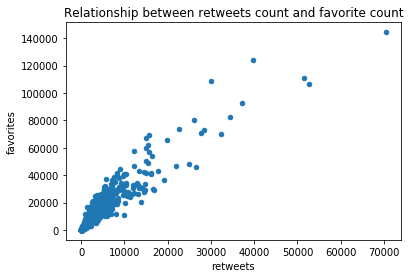

In [46]:
# Correlation between the favorite count and retweets count 
df.plot(x = 'retweets', y = 'favorites', kind = 'scatter') 
plt.title('Relationship between retweets count and favorite count') 
plt.show()